<a href="https://colab.research.google.com/github/HeberthDCM/CUDA/blob/main/tulipan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install nvcc4jupyter
%load_ext nvcc4jupyter


The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


Cargar y convertir imagen

In [42]:
import numpy as np
import plotly.express as px
from PIL import Image

imagen = Image.open(".//tulipan.jpg")
fig = px.imshow(imagen)
fig.show()
pixel = imagen.load()
print(pixel[0,0])

(238, 233, 227)


In [43]:
imagen_mat = np.array(list(imagen.getdata(band=0)), float)
print(imagen_mat)





[238. 238. 238. ... 177. 177. 177.]


In [44]:
imagen_mat = np.array(list(imagen.getdata(band=0)), float)
print(imagen_mat)

imagen_mat.shape = (imagen.size[1], imagen.size[0])
print(imagen_mat)

print(imagen_mat.shape)


[238. 238. 238. ... 177. 177. 177.]
[[238. 238. 238. ... 238. 238. 238.]
 [238. 238. 238. ... 238. 238. 238.]
 [238. 238. 238. ... 238. 238. 238.]
 ...
 [175. 175. 175. ... 180. 180. 180.]
 [173. 173. 173. ... 178. 178. 178.]
 [172. 172. 172. ... 177. 177. 177.]]
(256, 256)


In [45]:
fig = px.imshow(imagen_mat, color_continuous_scale='gray')
fig.show()
pixel = imagen.load()
print(pixel[0,0])

(238, 233, 227)


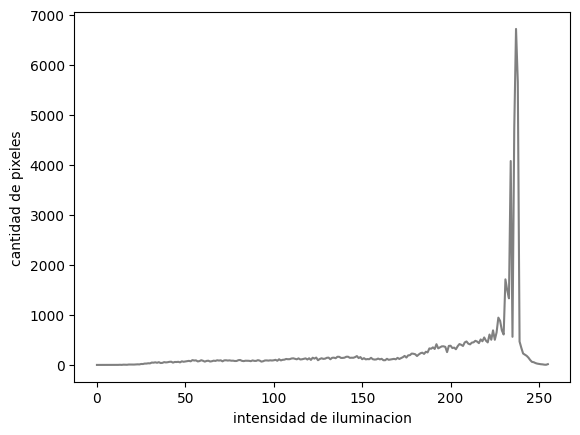

[[234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 ...
 [174 174 174 ... 180 180 180]
 [172 172 172 ... 178 178 178]
 [171 171 171 ... 177 177 177]]


In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagen = cv2.imread("tulipan.jpg", cv2.IMREAD_GRAYSCALE)
##cv2.imshow("tulipan.jpg", img)

hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()
#print(hist)
print(imagen)

In [47]:
print(imagen)

[[234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 ...
 [174 174 174 ... 180 180 180]
 [172 172 172 ... 178 178 178]
 [171 171 171 ... 177 177 177]]


In [48]:
#list = hist.tolist()

np.hstack(hist.astype("i"))




array([   0,    0,    0,    0,    0,    0,    1,    1,    1,    0,    0,
          0,    1,    3,    1,    5,    3,    3,    8,    7,    6,    7,
         10,   12,   10,   19,   18,   27,   27,   33,   31,   47,   45,
         52,   43,   55,   38,   41,   56,   50,   54,   62,   64,   46,
         59,   58,   62,   51,   72,   63,   69,   74,   81,   72,   96,
         88,   91,   70,   77,   94,   82,   66,   80,   84,   68,   74,
         85,   80,   93,   87,   92,   72,   91,   93,   87,   91,   84,
         85,   78,   79,   95,   98,   81,   76,   84,   82,   82,   75,
         90,   81,   80,   95,   87,   66,   74,   89,   90,   86,   92,
         88,   93,  102,   83,  113,   90,  102,  105,  119,  114,  115,
        128,  132,  121,  112,  131,  109,  113,  123,  131,  108,  133,
        100,  144,  126,  147,   94,  118,  133,  121,  125,  142,  146,
        113,  142,  145,  134,  163,  162,  140,  140,  145,  163,  164,
        142,  144,  143,  156,  177,  137,  157,  1

Suma y Resta de histogramas

In [49]:
%%cuda
#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
//using namespace std;

//KERNEL
__global__ void Brillo(int *histograma, int *factor, int *histograma_resultado, int n){
	// identificador de hilo
	int myID = threadIdx.x;

	// escritura de resultados
	histograma_resultado[myID] = histograma[myID] + factor[myID];
}



int main(int argc, char** argv){
    //Declaraciones
    int *h_histograma, *h_histograma_resultado,*h_brillo,*h_contraste;
    int *d_histograma, *d_histograma_resultado,*d_brillo,*d_contrsate;
    int n=256;
    int brillo=5;
    int contraste=2;

    //Reserva de memoria de variable HOST
    h_histograma = (int*)malloc(n * sizeof(int));
    h_brillo = (int*)malloc(n * sizeof(int));
    h_histograma_resultado = (int*)malloc(n * sizeof(int));

    //Reserva de memoria de variables DEVICE
    cudaMalloc((void**)&d_histograma, n * sizeof(int));
    cudaMalloc((void**)&d_brillo, n * sizeof(int));
    cudaMalloc((void**)&d_histograma_resultado, n * sizeof(int));

    // Inicialización de variables
    int histograma[256]={  16,    3,    5,    5,    5,   15,   12,   16,   22,   22,   29, 33,   39,   56,   66,   70,   73,   87,  111,  122,  132,  167, 178,  179,  215,  220,  305,  338,  367,  384,  438,  469,  508,
        568,  629,  625,  750,  741,  808,  857,  905,  963, 1039, 1107, 1151, 1277, 1253, 1351, 1402, 1455, 1518, 1584, 1655, 1667, 1743, 1807, 1965, 2023, 2144, 2094, 2183, 2387, 2358, 2375, 2377, 2418, 2459, 2625, 2663, 2561, 2556, 2522, 2654, 2682, 2551, 2561, 2507,
       2601, 2463, 2476, 2477, 2435, 2278, 2239, 2162, 2108, 2032, 1955, 1959, 1944, 1917, 1830, 1793, 1862, 1780, 1741, 1736, 1743, 1771, 1761, 1805, 1775, 1752, 1727, 1733, 1763, 1687, 1741, 1728, 1703, 1729, 1699, 1723, 1729, 1750, 1663, 1579, 1457, 1425, 1367, 1320,
       1317, 1254, 1172, 1170, 1105,  976,  958,  937,  931,  906,  853, 909,  808,  817,  771,  846,  781,  770,  782,  773,  735,  803, 712,  750,  742,  732,  761,  691,  685,  699,  701,  709,  737, 765,  744,  734,  735,  793,  751,  769,  816,  824,  778,  875,
        839,  848,  881,  913,  919,  937,  936, 1008, 1012, 1031, 1021, 1079, 1103, 1020, 1137, 1083, 1084, 1157, 1152, 1171, 1180, 1183, 1160, 1241, 1220, 1174, 1214, 1272, 1260, 1229, 1165, 1197, 1196, 1186, 1048, 1241, 1120, 1100,  983,  903,  880,  768,  626,  516,
        454,  327,  250,  198,  137,  129,   95,   80,   76,   69,   67, 61,   59,   48,   34,   23,   20,   27,   26,   18,   11,   13,  7,   11,    8,   14,    6,    2,    2,    3,    3,    0,    1, 1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0};
    for (int i = 0; i < n; i++){
      h_histograma[i] = histograma[i];
		  h_brillo[i] = brillo;
      h_histograma_resultado[i]=0;
    }

    // cout<<histograma[100];

    //Transferencia de datos al DEVICE
    cudaMemcpy(d_histograma, h_histograma, n * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_brillo, h_brillo, n * sizeof(int), cudaMemcpyHostToDevice);

    //Lanzamiento de Kernel
    Brillo <<< 1, n >>>(d_histograma,d_brillo,d_histograma_resultado,n);


    // Transferencia de dato al HOST
    cudaMemcpy(h_histograma_resultado, d_histograma_resultado, n * sizeof(int), cudaMemcpyDeviceToHost);

    // Mostrar resultados
    printf("Histograma :\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma[i]);
    }

    printf("\n");
    printf("Histograma resultado:\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma_resultado[i]);
    }

    return 0;
}


Histograma :
16  3  5  5  5 15 12 16 22 22 29 33 39 56 66 70 73 87 111 122 132 167 178 179 215 220 305 338 367 384 438 469 508 568 629 625 750 741 808 857 905 963 1039 1107 1151 1277 1253 1351 1402 1455 1518 1584 1655 1667 1743 1807 1965 2023 2144 2094 2183 2387 2358 2375 2377 2418 2459 2625 2663 2561 2556 2522 2654 2682 2551 2561 2507 2601 2463 2476 2477 2435 2278 2239 2162 2108 2032 1955 1959 1944 1917 1830 1793 1862 1780 1741 1736 1743 1771 1761 1805 1775 1752 1727 1733 1763 1687 1741 1728 1703 1729 1699 1723 1729 1750 1663 1579 1457 1425 1367 1320 1317 1254 1172 1170 1105 976 958 937 931 906 853 909 808 817 771 846 781 770 782 773 735 803 712 750 742 732 761 691 685 699 701 709 737 765 744 734 735 793 751 769 816 824 778 875 839 848 881 913 919 937 936 1008 1012 1031 1021 1079 1103 1020 1137 1083 1084 1157 1152 1171 1180 1183 1160 1241 1220 1174 1214 1272 1260 1229 1165 1197 1196 1186 1048 1241 1120 1100 983 903 880 768 626 516 454 327 250 198 137 129 95 80 76 69 67 61 59 48 34 23 

In [50]:
%%cuda
// PROGRAMACIÓN EN CUDA C/C++
//
// includes
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
// defines
#define N 16

int main(int argc, char** argv)
{
	// declaraciones
	float *hst_A, *hst_B; // punteros para direccionar los datos del host
	float *dev_A, *dev_B; // punteros para direccionar los datos del device

	// reserva en el host
	hst_A = (float*)malloc(N * sizeof(float)); // Reservar N bytes en memoria del host en el puntero hst_A
	hst_B = (float*)malloc(N * sizeof(float));

	// reserva en el device
	cudaMalloc((void**)&dev_A, N * sizeof(float)); // Reservar N bytes en memoria del device en el puntero dev_A
	cudaMalloc((void**)&dev_B, N * sizeof(float));

	// incializacion los datos (arrays) del host
	for (int i = 0; i<N; i++)
	{
		hst_A[i] = (float)rand() / RAND_MAX; // con números aleatorios entre 0 y 1
		hst_B[i] = 0; // con número 0
	}


	// copia de datos
	// de host a device
	cudaMemcpy(dev_A, hst_A, N * sizeof(float), cudaMemcpyHostToDevice);
	// en device entre variables
	cudaMemcpy(dev_B, dev_A, N * sizeof(float), cudaMemcpyDeviceToDevice);
	// de device a host
	cudaMemcpy(hst_B, dev_B, N * sizeof(float), cudaMemcpyDeviceToHost);

	// muestra de resultados
	printf("ENTRADA (hst_A):\n");
	for (int i = 0; i<N; i++)
		printf("%.2f ", hst_A[i]);
	printf("\n");
	printf("SALIDA (hst_B):\n");
	for (int i = 0; i<N; i++)
		printf("%.2f ", hst_B[i]);
	printf("\n");

	// liberacion de recursos
	cudaFree(dev_A);
	cudaFree(dev_B);

	// salida del programa
	printf("\n<pulsa [INTRO] para finalizar>\n");
	getchar();
	return 0;
}

ENTRADA (hst_A):
0.84 0.39 0.78 0.80 0.91 0.20 0.34 0.77 0.28 0.55 0.48 0.63 0.36 0.51 0.95 0.92 
SALIDA (hst_B):
0.84 0.39 0.78 0.80 0.91 0.20 0.34 0.77 0.28 0.55 0.48 0.63 0.36 0.51 0.95 0.92 

<pulsa [INTRO] para finalizar>



In [51]:
%%cuda
// includes
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>


//Kernel
__global__ void suma(int *vector_1, int *vector_2, int *vector_suma, int n)
{
	// identificador de hilo
	int myID = threadIdx.x;
	// generamos el vector 2
	vector_2[myID] = (n - 1) - myID;
	// escritura de resultados
	vector_suma[myID] = vector_1[myID] + vector_2[myID];
}

int main(int argc, char** argv)
{
	// declaraciones
	int *hst_vector1, *hst_vector2, *hst_resultado;
	int *dev_vector1, *dev_vector2, *dev_resultado;
	int n = 8;

	// reserva en el host
	hst_vector1 = (int*)malloc(n * sizeof(int));
	hst_vector2 = (int*)malloc(n * sizeof(int));
	hst_resultado = (int*)malloc(n * sizeof(int));

	// reserva en el device
	cudaMalloc((void**)&dev_vector1, n * sizeof(int));
	cudaMalloc((void**)&dev_vector2, n * sizeof(int));
	cudaMalloc((void**)&dev_resultado, n * sizeof(int));

	// inicializacion de vectores
	for (int i = 0; i < n; i++)
	{
		hst_vector1[i] = i;
		hst_vector2[i] = 0;
	}

	// copia de datos hacia el device
	cudaMemcpy(dev_vector1, hst_vector1, n * sizeof(int), cudaMemcpyHostToDevice);

	// LANZAMIENTO DEL KERNEL
	suma << < 1, n >> >(dev_vector1, dev_vector2, dev_resultado, n);

	// recogida de datos desde el device
	cudaMemcpy(hst_vector2, dev_vector2, n * sizeof(int), cudaMemcpyDeviceToHost);
	cudaMemcpy(hst_resultado, dev_resultado, n * sizeof(int), cudaMemcpyDeviceToHost);

	// impresion de resultados
	printf("VECTOR 1:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_vector1[i]);
	}
	printf("\n");
	printf("VECTOR 2:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_vector2[i]);
	}
	printf("\n");
	printf("SUMA:\n");
	for (int i = 0; i < n; i++)
	{
		printf("%2d ", hst_resultado[i]);
	}
	printf("\n");
	// salida
	printf("***************************************************\n");
	printf("<pulsa [INTRO] para finalizar>");
	getchar();
	return 0;
}

VECTOR 1:
 0  1  2  3  4  5  6  7 
VECTOR 2:
 7  6  5  4  3  2  1  0 
SUMA:
 7  7  7  7  7  7  7  7 
***************************************************
<pulsa [INTRO] para finalizar>


In [52]:
%%cuda
#include <iostream>
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
//using namespace std;

//KERNEL
__global__ void Brillo(int *histograma, int *factor, int *histograma_resultado, int n){
	// identificador de hilo
	int myID = threadIdx.x;

	// escritura de resultados
	histograma_resultado[myID] = histograma[myID+5];
}



int main(int argc, char** argv){
    //Declaraciones
    int *h_histograma, *h_histograma_resultado,*h_brillo,*h_contraste;
    int *d_histograma, *d_histograma_resultado,*d_brillo,*d_contrsate;
    int n=256;
    int brillo=5;
    int contraste=2;

    //Reserva de memoria de variable HOST
    h_histograma = (int*)malloc(n * sizeof(int));
    h_brillo = (int*)malloc(n * sizeof(int));
    h_histograma_resultado = (int*)malloc(n * sizeof(int));

    //Reserva de memoria de variables DEVICE
    cudaMalloc((void**)&d_histograma, n * sizeof(int));
    cudaMalloc((void**)&d_brillo, n * sizeof(int));
    cudaMalloc((void**)&d_histograma_resultado, n * sizeof(int));

    // Inicialización de variables
    int histograma[256]={  16,    3,    5,    5,    5,   15,   12,   16,   22,   22,   29, 33,   39,   56,   66,   70,   73,   87,  111,  122,  132,  167, 178,  179,  215,  220,  305,  338,  367,  384,  438,  469,  508,
        568,  629,  625,  750,  741,  808,  857,  905,  963, 1039, 1107, 1151, 1277, 1253, 1351, 1402, 1455, 1518, 1584, 1655, 1667, 1743, 1807, 1965, 2023, 2144, 2094, 2183, 2387, 2358, 2375, 2377, 2418, 2459, 2625, 2663, 2561, 2556, 2522, 2654, 2682, 2551, 2561, 2507,
       2601, 2463, 2476, 2477, 2435, 2278, 2239, 2162, 2108, 2032, 1955, 1959, 1944, 1917, 1830, 1793, 1862, 1780, 1741, 1736, 1743, 1771, 1761, 1805, 1775, 1752, 1727, 1733, 1763, 1687, 1741, 1728, 1703, 1729, 1699, 1723, 1729, 1750, 1663, 1579, 1457, 1425, 1367, 1320,
       1317, 1254, 1172, 1170, 1105,  976,  958,  937,  931,  906,  853, 909,  808,  817,  771,  846,  781,  770,  782,  773,  735,  803, 712,  750,  742,  732,  761,  691,  685,  699,  701,  709,  737, 765,  744,  734,  735,  793,  751,  769,  816,  824,  778,  875,
        839,  848,  881,  913,  919,  937,  936, 1008, 1012, 1031, 1021, 1079, 1103, 1020, 1137, 1083, 1084, 1157, 1152, 1171, 1180, 1183, 1160, 1241, 1220, 1174, 1214, 1272, 1260, 1229, 1165, 1197, 1196, 1186, 1048, 1241, 1120, 1100,  983,  903,  880,  768,  626,  516,
        454,  327,  250,  198,  137,  129,   95,   80,   76,   69,   67, 61,   59,   48,   34,   23,   20,   27,   26,   18,   11,   13,  7,   11,    8,   14,    6,    2,    2,    3,    3,    0,    1, 1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0};
    for (int i = 0; i < n; i++){
      h_histograma[i] = histograma[i];
		  h_brillo[i] = brillo;
      h_histograma_resultado[i]=0;
    }

    // cout<<histograma[100];

    //Transferencia de datos al DEVICE
    cudaMemcpy(d_histograma, h_histograma, n * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(d_brillo, h_brillo, n * sizeof(int), cudaMemcpyHostToDevice);

    //Lanzamiento de Kernel
    Brillo <<< 1, n >>>(d_histograma,d_brillo,d_histograma_resultado,n);


    // Transferencia de dato al HOST
    cudaMemcpy(h_histograma_resultado, d_histograma_resultado, n * sizeof(int), cudaMemcpyDeviceToHost);

    // Mostrar resultados
    printf("Histograma :\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma[i]);
    }

    printf("\n");
    printf("Histograma resultado:\n");
    for (int i = 0; i < n; i++){
		  printf("%2d ", h_histograma_resultado[i]);
    }

    return 0;
}


Histograma :
16  3  5  5  5 15 12 16 22 22 29 33 39 56 66 70 73 87 111 122 132 167 178 179 215 220 305 338 367 384 438 469 508 568 629 625 750 741 808 857 905 963 1039 1107 1151 1277 1253 1351 1402 1455 1518 1584 1655 1667 1743 1807 1965 2023 2144 2094 2183 2387 2358 2375 2377 2418 2459 2625 2663 2561 2556 2522 2654 2682 2551 2561 2507 2601 2463 2476 2477 2435 2278 2239 2162 2108 2032 1955 1959 1944 1917 1830 1793 1862 1780 1741 1736 1743 1771 1761 1805 1775 1752 1727 1733 1763 1687 1741 1728 1703 1729 1699 1723 1729 1750 1663 1579 1457 1425 1367 1320 1317 1254 1172 1170 1105 976 958 937 931 906 853 909 808 817 771 846 781 770 782 773 735 803 712 750 742 732 761 691 685 699 701 709 737 765 744 734 735 793 751 769 816 824 778 875 839 848 881 913 919 937 936 1008 1012 1031 1021 1079 1103 1020 1137 1083 1084 1157 1152 1171 1180 1183 1160 1241 1220 1174 1214 1272 1260 1229 1165 1197 1196 1186 1048 1241 1120 1100 983 903 880 768 626 516 454 327 250 198 137 129 95 80 76 69 67 61 59 48 34 23 